In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [3]:
# load dataset
file_path = r"C:\Users\dariu\Desktop\Anomaly-detection-in-Microservices-based-systems\application anomalies dataset\data1.csv"  
df = pd.read_csv(file_path)

In [4]:
# pretraitement des donnees 
features = ["99th quantile", "50th quantile", "Mean", "2xx", "4xx/5xx"]
X = df[features]
y = df["IsError"].astype(int)

# Normalisation des données
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Séparation en données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

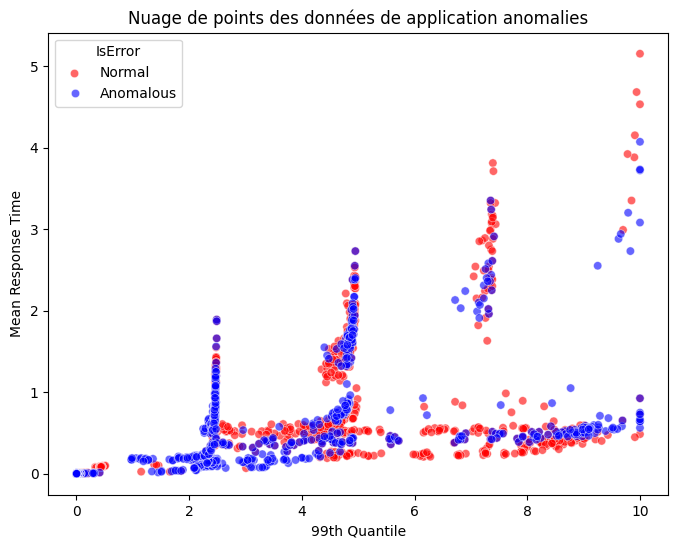

In [5]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["99th quantile"], y=df["Mean"], hue=y, palette={0: "blue", 1: "red"}, alpha=0.6)
plt.xlabel("99th Quantile")
plt.ylabel("Mean Response Time")
plt.title("Nuage de points des données de application anomalies")
plt.legend(title="IsError", labels=["Normal", "Anomalous"])
plt.show()

In [ ]:
param_grid = {
    'hidden_layer_sizes': [(8), (8, 16), (16, 8, 16), (16, 8), (8, 8, 16)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.0001, 0.00001, 0.01]
}

grid_search = GridSearchCV(MLPClassifier(max_iter=1500, random_state=42), param_grid, cv=3, scoring='f1')
grid_search.fit(X_train, y_train)


print("Meilleurs paramètres :", grid_search.best_params_)

Meilleurs paramètres : {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (8, 16), 'learning_rate_init': 0.01, 'solver': 'adam'}


In [7]:
# training model with best hyperparam
best_mlp = grid_search.best_estimator_
best_mlp.fit(X_train, y_train)

MLPClassifier(activation='tanh', alpha=0.001, hidden_layer_sizes=(8, 16),
              learning_rate_init=0.01, max_iter=1500, random_state=42)

In [ ]:
# evaluate model
y_pred = best_mlp.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

✅ Accuracy: 0.67
🎯 Precision: 0.62
🔍 Recall: 0.85
📊 F1-Score: 0.72


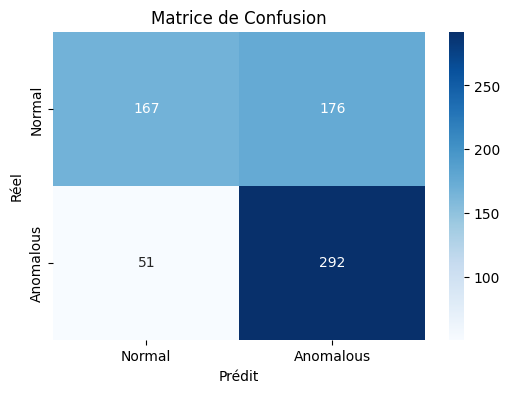

In [9]:
# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Anomalous"], yticklabels=["Normal", "Anomalous"])
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de Confusion")
plt.show()

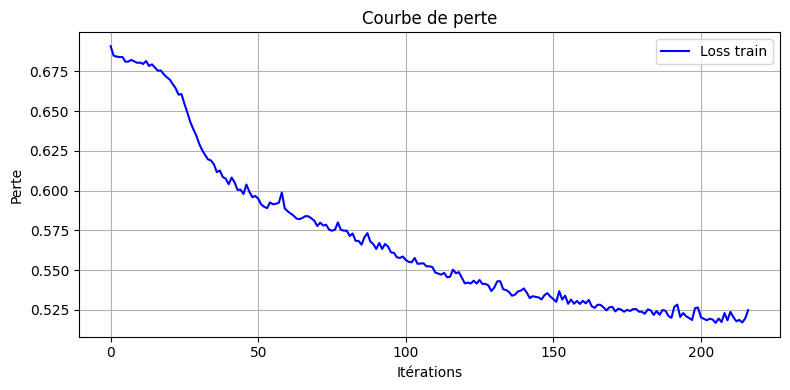

In [12]:
# Courbe de perte d'entraînement
plt.figure(figsize=(8, 4))
plt.plot(best_mlp.loss_curve_, label="Loss train", color='blue')
plt.title("Courbe de perte")
plt.xlabel("Itérations")
plt.ylabel("Perte")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()